Accuracy: 0.9736842105263158


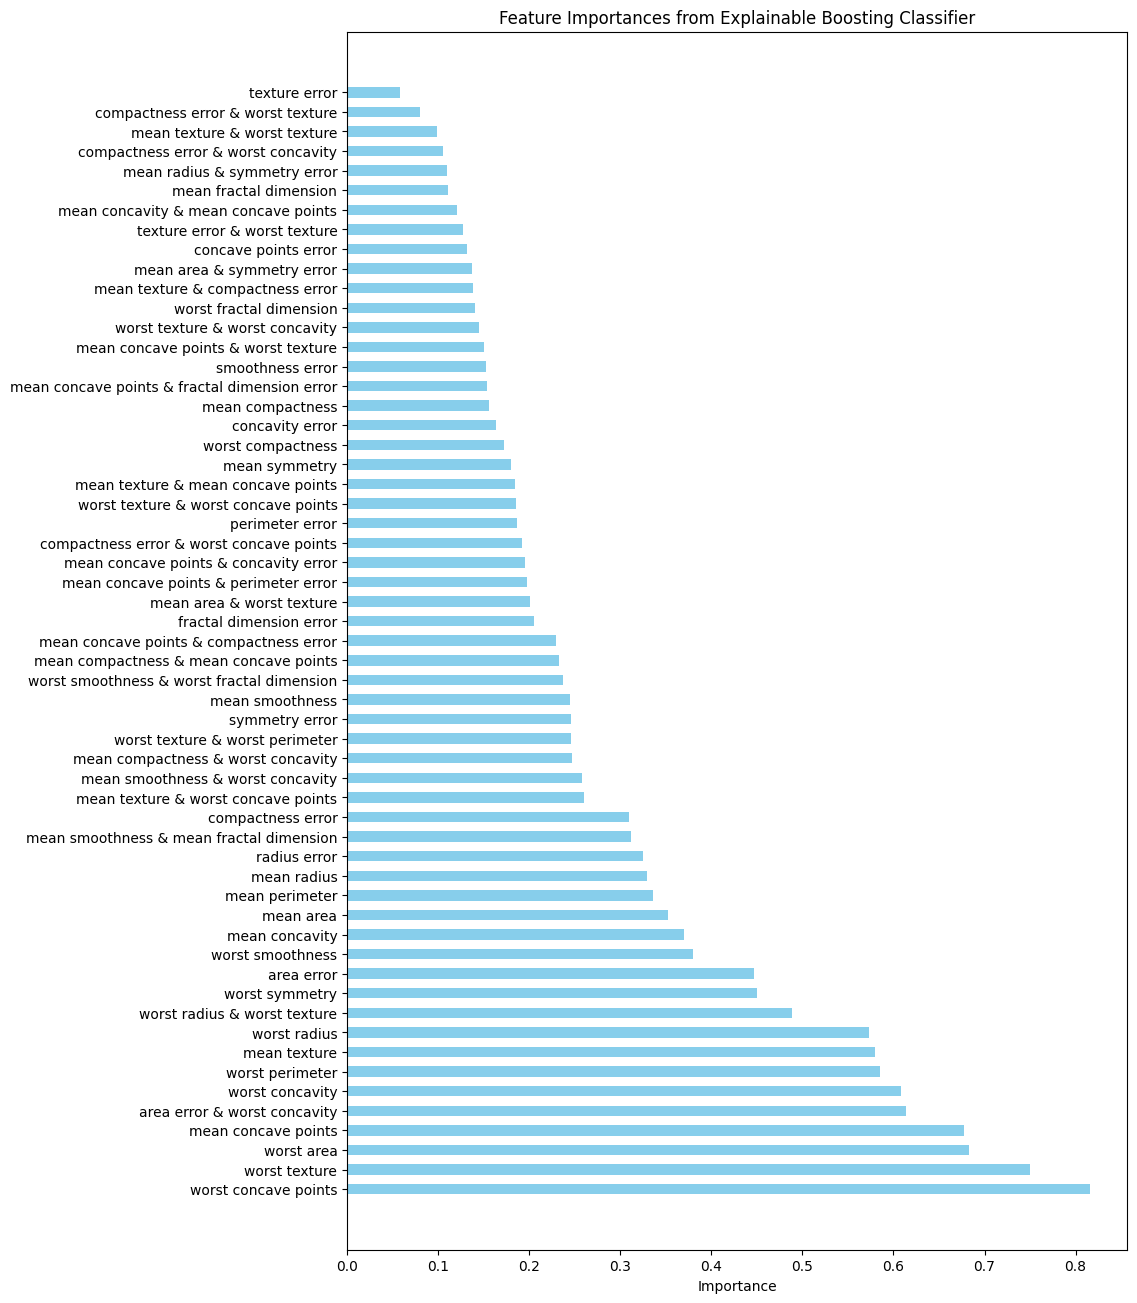

In [1]:
# Ensure plots are displayed in the notebook
%matplotlib inline

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from interpret.glassbox import ExplainableBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load a sample dataset from scikit-learn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert the dataset into a DataFrame and Series
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target)  # Labels

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Explainable Boosting Machine (EBM) model
ebm = ExplainableBoostingClassifier()

# Train the EBM model using the training data
ebm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ebm.predict(X_test)

# Calculate and print the accuracy of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Interpret the model to understand feature importances
ebm_global = ebm.explain_global(name='EBM')

# Extract feature names and their importance scores
feature_names = ebm_global.data()['names']
importances = ebm_global.data()['scores']

# Sort features by importance
sorted_idx = np.argsort(importances)
sorted_feature_names = np.array(feature_names)[sorted_idx]
sorted_importances = np.array(importances)[sorted_idx]

# Increase spacing between the feature names for better readability
y_positions = np.arange(len(sorted_feature_names)) * 1.5

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(12, 14))  # Set figure size for better visibility
plt.barh(y_positions, sorted_importances, color='skyblue', align='center')
plt.yticks(y_positions, sorted_feature_names)
plt.xlabel('Importance')
plt.title('Feature Importances from Explainable Boosting Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to have most important features at the top

# Adjust spacing and margins of the plot
plt.subplots_adjust(left=0.3, right=0.95, top=0.95, bottom=0.08)

# Display the plot
plt.show()
